In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/widsdatathon2025/SAMPLE_SUBMISSION.xlsx
/kaggle/input/widsdatathon2025/Data Dictionary.xlsx
/kaggle/input/widsdatathon2025/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv
/kaggle/input/widsdatathon2025/TEST/TEST_CATEGORICAL.xlsx
/kaggle/input/widsdatathon2025/TEST/TEST_QUANTITATIVE_METADATA.xlsx
/kaggle/input/widsdatathon2025/TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv
/kaggle/input/widsdatathon2025/TRAIN/TRAINING_SOLUTIONS.xlsx
/kaggle/input/widsdatathon2025/TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx
/kaggle/input/widsdatathon2025/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx


In [2]:
#training Data Sets
train_categorical = pd.read_excel('/kaggle/input/widsdatathon2025/TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx')
train_functional = pd.read_csv('/kaggle/input/widsdatathon2025/TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv')
train_quantitative = pd.read_excel('/kaggle/input/widsdatathon2025/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx')

train_solutions = pd.read_excel('/kaggle/input/widsdatathon2025/TRAIN/TRAINING_SOLUTIONS.xlsx')

#Test Data Sets
test_categorical = pd.read_excel('/kaggle/input/widsdatathon2025/TEST/TEST_CATEGORICAL.xlsx')
test_functional = pd.read_csv('/kaggle/input/widsdatathon2025/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv')
test_quantitative = pd.read_excel('/kaggle/input/widsdatathon2025/TEST/TEST_QUANTITATIVE_METADATA.xlsx')


In [3]:
#fill missing values
train_categorical['PreInt_Demos_Fam_Child_Ethnicity'].fillna(train_categorical['PreInt_Demos_Fam_Child_Ethnicity'].mode()[0], inplace=True)

test_categorical['PreInt_Demos_Fam_Child_Ethnicity'].fillna(test_categorical['PreInt_Demos_Fam_Child_Ethnicity'].mode()[0], inplace=True)
test_categorical['PreInt_Demos_Fam_Child_Race'].fillna(test_categorical['PreInt_Demos_Fam_Child_Race'].mode()[0], inplace=True)
test_categorical['Barratt_Barratt_P1_Edu'].fillna(test_categorical['Barratt_Barratt_P1_Edu'].mode()[0], inplace=True)
test_categorical['Barratt_Barratt_P1_Occ'].fillna(test_categorical['Barratt_Barratt_P1_Occ'].mode()[0], inplace=True)
test_categorical['Barratt_Barratt_P2_Edu'].fillna(test_categorical['Barratt_Barratt_P2_Edu'].mode()[0], inplace=True)
test_categorical['Barratt_Barratt_P2_Occ'].fillna(test_categorical['Barratt_Barratt_P2_Occ'].mode()[0], inplace=True)

train_quantitative['MRI_Track_Age_at_Scan'].fillna(train_quantitative['MRI_Track_Age_at_Scan'].median(), inplace=True)

test_quantitative['EHQ_EHQ_Total'].fillna(test_quantitative['EHQ_EHQ_Total'].median(), inplace=True)
test_quantitative['ColorVision_CV_Score'].fillna(test_quantitative['ColorVision_CV_Score'].median(), inplace=True)
test_quantitative['APQ_P_APQ_P_CP'].fillna(test_quantitative['APQ_P_APQ_P_CP'].median(), inplace=True)
test_quantitative['APQ_P_APQ_P_ID'].fillna(test_quantitative['APQ_P_APQ_P_ID'].median(), inplace=True)
test_quantitative['APQ_P_APQ_P_INV'].fillna(test_quantitative['APQ_P_APQ_P_INV'].median(), inplace=True)
test_quantitative['APQ_P_APQ_P_OPD'].fillna(test_quantitative['APQ_P_APQ_P_OPD'].median(), inplace=True)
test_quantitative['APQ_P_APQ_P_PM'].fillna(test_quantitative['APQ_P_APQ_P_PM'].median(), inplace=True)
test_quantitative['APQ_P_APQ_P_PP'].fillna(test_quantitative['APQ_P_APQ_P_PP'].median(), inplace=True)

test_quantitative['SDQ_SDQ_Conduct_Problems'].fillna(test_quantitative['SDQ_SDQ_Conduct_Problems'].median(), inplace=True)
test_quantitative['SDQ_SDQ_Difficulties_Total'].fillna(test_quantitative['SDQ_SDQ_Difficulties_Total'].median(), inplace=True)
test_quantitative['SDQ_SDQ_Emotional_Problems'].fillna(test_quantitative['SDQ_SDQ_Emotional_Problems'].median(), inplace=True)
test_quantitative['SDQ_SDQ_Externalizing'].fillna(test_quantitative['SDQ_SDQ_Externalizing'].median(), inplace=True)
test_quantitative['SDQ_SDQ_Generating_Impact'].fillna(test_quantitative['SDQ_SDQ_Generating_Impact'].median(), inplace=True)
test_quantitative['SDQ_SDQ_Hyperactivity'].fillna(test_quantitative['SDQ_SDQ_Hyperactivity'].median(), inplace=True)
test_quantitative['SDQ_SDQ_Internalizing'].fillna(test_quantitative['SDQ_SDQ_Internalizing'].median(), inplace=True)
test_quantitative['SDQ_SDQ_Peer_Problems'].fillna(test_quantitative['SDQ_SDQ_Peer_Problems'].median(), inplace=True)
test_quantitative['SDQ_SDQ_Prosocial'].fillna(test_quantitative['SDQ_SDQ_Prosocial'].median(), inplace=True)

<ipython-input-3-322137524484>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_categorical['PreInt_Demos_Fam_Child_Ethnicity'].fillna(train_categorical['PreInt_Demos_Fam_Child_Ethnicity'].mode()[0], inplace=True)
<ipython-input-3-322137524484>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

***Feature Engineering for Train_categorical and test_categorical***

In [4]:
train_categorical["new_col"]=train_categorical["Barratt_Barratt_P1_Edu"]+train_categorical["Barratt_Barratt_P2_Edu"]

In [5]:
concat_train_categorical = pd.concat([train_categorical, test_categorical], axis =0)

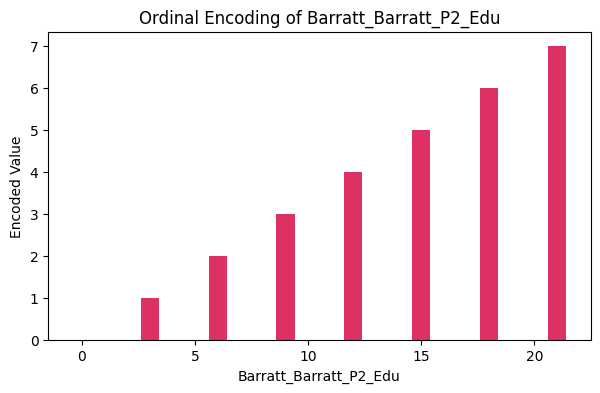

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

concat_train_categorical['Encoded_Barratt_Barratt_P2_Edu'] = ordinal_encoder.fit_transform(concat_train_categorical[['Barratt_Barratt_P2_Edu']])

# Plotting the encoded values
plt.figure(figsize=(7, 4))
plt.bar(concat_train_categorical['Barratt_Barratt_P2_Edu'], concat_train_categorical['Encoded_Barratt_Barratt_P2_Edu'], color='#DE3163')
plt.xlabel('Barratt_Barratt_P2_Edu')
plt.ylabel('Encoded Value')
plt.title('Ordinal Encoding of Barratt_Barratt_P2_Edu')
plt.show()


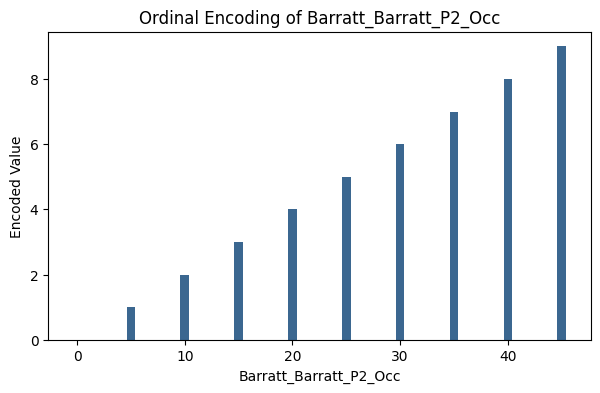

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

concat_train_categorical['Encoded_Barratt_Barratt_P2_Occ'] = ordinal_encoder.fit_transform(concat_train_categorical[['Barratt_Barratt_P2_Occ']])

# Plotting the encoded values
plt.figure(figsize=(7, 4))
plt.bar(concat_train_categorical['Barratt_Barratt_P2_Occ'], concat_train_categorical['Encoded_Barratt_Barratt_P2_Occ'], color='#3B6790')
plt.xlabel('Barratt_Barratt_P2_Occ')
plt.ylabel('Encoded Value')
plt.title('Ordinal Encoding of Barratt_Barratt_P2_Occ')
plt.show()

In [8]:
#Ordinal Encoding for categorical Variables
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# Define the columns that need ordinal encoding
ordinal_columns = [
    'Barratt_Barratt_P2_Edu',
    'Barratt_Barratt_P2_Occ',
    'Barratt_Barratt_P1_Occ',
    'Basic_Demos_Study_Site',
    'PreInt_Demos_Fam_Child_Race'
]

# Create an OrdinalEncoder instance
ordinal_encoder = OrdinalEncoder()

# Apply ordinal encoding and replace the original columns
concat_train_categorical[ordinal_columns] = ordinal_encoder.fit_transform(concat_train_categorical[ordinal_columns])

# Convert back to DataFrame to maintain column names
concat_train_categorical[ordinal_columns] = concat_train_categorical[ordinal_columns].astype(int)  # Convert to integer values

# Display the updated DataFrame
#print(train_categorical.head())


In [9]:
#Parental Education level 
concat_train_categorical['Avg_Parent_Edu'] = (concat_train_categorical['Barratt_Barratt_P1_Edu'] + concat_train_categorical['Barratt_Barratt_P2_Edu']) / 2

#Parental Occupation Level
concat_train_categorical['Occ_level'] = (concat_train_categorical['Barratt_Barratt_P1_Occ'] +concat_train_categorical['Barratt_Barratt_P2_Occ']) 


In [10]:
#divide into categories of Parental Education level
def classify_edu(value):
    if value < 5:
        return 1
    elif 5 <= value < 10:
        return 2
    elif 10 <= value < 15:
        return 3
    else:
        return 4

concat_train_categorical['Parent_Edu_Class'] = concat_train_categorical['Avg_Parent_Edu'].apply(classify_edu)


In [11]:
#divide into categories of Parental Education level
def classify_Occ(value):
    if value<30:
        return 1
    elif 30<=value<60:
        return 2
    else:
        return 3

concat_train_categorical['Parental_Occ_Class']=concat_train_categorical['Occ_level'].apply(classify_Occ)

In [12]:
concat_train_categorical.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,new_col,Encoded_Barratt_Barratt_P2_Edu,Encoded_Barratt_Barratt_P2_Occ,Avg_Parent_Edu,Occ_level,Parent_Edu_Class,Parental_Occ_Class
0,UmrK0vMLopoR,2016,0,0.0,0,1,21.0,9,7,9,42.0,7.0,9.0,14.0,18,3,1
1,CPaeQkhcjg7d,2019,2,1.0,2,3,15.0,3,0,0,15.0,0.0,0.0,7.5,3,2,1
2,Nb4EetVPm3gs,2016,0,1.0,6,1,18.0,8,0,0,18.0,0.0,0.0,9.0,8,2,1
3,p4vPhVu91o4b,2018,2,0.0,6,3,15.0,6,6,0,33.0,6.0,0.0,10.5,6,3,1
4,M09PXs7arQ5E,2019,2,0.0,1,3,15.0,4,0,0,15.0,0.0,0.0,7.5,4,2,1


In [13]:
train_cat = concat_train_categorical.dropna(subset=['new_col'])
test_cat = concat_train_categorical[concat_train_categorical['new_col'].isna()]

test_cat = test_cat.drop(columns=['new_col'])

In [14]:
test_cat.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,Encoded_Barratt_Barratt_P2_Edu,Encoded_Barratt_Barratt_P2_Occ,Avg_Parent_Edu,Occ_level,Parent_Edu_Class,Parental_Occ_Class
0,Cfwaf5FX7jWK,2022,3,0.0,0,4,21.0,6,6,6,6.0,6.0,13.5,12,3,1
1,vhGrzmvA3Hjq,2023,3,0.0,0,4,21.0,9,7,6,7.0,6.0,14.0,15,3,1
2,ULliyEXjy4OV,2022,3,0.0,0,4,21.0,8,6,8,6.0,8.0,13.5,16,3,1
3,LZfeAb1xMtql,2022,3,0.0,0,3,21.0,9,7,9,7.0,9.0,14.0,18,3,1
4,EnFOUv0YK1RG,2022,3,2.0,0,4,18.0,0,7,9,7.0,9.0,12.5,9,3,1


In [15]:
train_cat = train_cat.drop(columns=['new_col'])

In [16]:
#features selections for each target variable................

###### for target = ADHD_Outcome

from sklearn.feature_selection import chi2, SelectKBest

# Assuming 'X_categorical' contains categorical features and 'y' is the target variable
y=train_solutions['ADHD_Outcome']

train_cat_target1=train_cat.drop(columns=['participant_id'])

chi2_selector = SelectKBest(score_func=chi2, k='all')  # Adjust 'k' as needed
chi2_selector.fit(train_cat_target1, y)

# Get the scores
chi2_scores = pd.Series(chi2_selector.scores_, index=train_cat_target1.columns)
selected_train_cat_target1 = chi2_scores.nlargest(10).index  # Keeping top 15 features

train_categorical_selected_target1 = train_cat_target1[selected_train_cat_target1]


In [17]:
train_categorical_selected_target1

,Basic_Demos_Study_Site,MRI_Track_Scan_Location,Barratt_Barratt_P1_Occ,PreInt_Demos_Fam_Child_Race,PreInt_Demos_Fam_Child_Ethnicity,Barratt_Barratt_P2_Edu,Encoded_Barratt_Barratt_P2_Edu,Occ_level,Barratt_Barratt_P2_Occ,Encoded_Barratt_Barratt_P2_Occ
0,0,1,9,0,0.0,7,7.0,18,9,9.0
1,2,3,3,2,1.0,0,0.0,3,0,0.0
2,0,1,8,6,1.0,0,0.0,8,0,0.0
3,2,3,6,6,0.0,6,6.0,6,0,0.0
4,2,3,4,1,0.0,0,0.0,4,0,0.0
...,...,...,...,...,...,...,...,...,...,...
1208,0,2,8,0,0.0,7,7.0,16,8,8.0
1209,0,1,7,0,0.0,0,0.0,7,0,0.0
1210,0,1,4,2,1.0,0,0.0,4,0,0.0
1211,2,3,8,6,0.0,6,6.0,17,9,9.0


In [18]:
###### for target = Sex_F

from sklearn.feature_selection import chi2, SelectKBest

# Assuming 'X_categorical' contains categorical features and 'y' is the target variable
y=train_solutions['Sex_F']

train_cat_target2=train_cat.drop(columns=['participant_id'])

chi2_selector = SelectKBest(score_func=chi2, k='all')  # Adjust 'k' as needed
chi2_selector.fit(train_cat_target2, y)

# Get the scores
chi2_scores = pd.Series(chi2_selector.scores_, index=train_cat_target2.columns)
selected_train_cat_target2 = chi2_scores.nlargest(10).index  # Keeping top 15 features

train_categorical_selected_target2 = train_cat_target2[selected_train_cat_target2]

In [19]:
train_categorical_selected_target2

,Barratt_Barratt_P2_Occ,Encoded_Barratt_Barratt_P2_Occ,Barratt_Barratt_P1_Occ,Basic_Demos_Study_Site,Barratt_Barratt_P1_Edu,MRI_Track_Scan_Location,Avg_Parent_Edu,PreInt_Demos_Fam_Child_Race,PreInt_Demos_Fam_Child_Ethnicity,Barratt_Barratt_P2_Edu
0,9,9.0,9,0,21.0,1,14.0,0,0.0,7
1,0,0.0,3,2,15.0,3,7.5,2,1.0,0
2,0,0.0,8,0,18.0,1,9.0,6,1.0,0
3,0,0.0,6,2,15.0,3,10.5,6,0.0,6
4,0,0.0,4,2,15.0,3,7.5,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1208,8,8.0,8,0,21.0,2,14.0,0,0.0,7
1209,0,0.0,7,0,18.0,1,9.0,0,0.0,0
1210,0,0.0,4,0,18.0,1,9.0,2,1.0,0
1211,9,9.0,8,2,21.0,3,13.5,6,0.0,6


***Feature Engineering for Train_quantitative and test_quantitative***

In [20]:
train_quantitative["new_col"]=train_quantitative["APQ_P_APQ_P_CP"]+train_quantitative["APQ_P_APQ_P_PP"]

In [21]:
concat_train_quantitative = pd.concat([train_quantitative, test_quantitative], axis =0)

In [22]:
concat_train_quantitative

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan,new_col
0,UmrK0vMLopoR,40.00,13.0,3.0,10.0,47.0,13.0,11.0,28.0,0.0,6.0,1.0,5.0,0.0,5.0,1.0,0.0,10.0,10.739219,31.0
1,CPaeQkhcjg7d,-94.47,14.0,3.0,13.0,34.0,18.0,23.0,30.0,0.0,18.0,6.0,8.0,7.0,8.0,10.0,4.0,5.0,10.739219,33.0
2,Nb4EetVPm3gs,-46.67,14.0,4.0,10.0,35.0,16.0,10.0,29.0,1.0,14.0,2.0,8.0,5.0,7.0,6.0,4.0,9.0,8.239904,33.0
3,p4vPhVu91o4b,-26.68,10.0,5.0,12.0,39.0,19.0,16.0,28.0,6.0,24.0,4.0,16.0,9.0,10.0,8.0,4.0,6.0,10.739219,33.0
4,M09PXs7arQ5E,0.00,14.0,5.0,15.0,40.0,20.0,24.0,28.0,1.0,18.0,4.0,11.0,4.0,10.0,7.0,3.0,9.0,8.940679,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,UadZfjdEg7eG,86.71,14.0,3.0,17.0,41.0,17.0,11.0,25.0,1.0,18.0,7.0,7.0,5.0,6.0,11.0,4.0,7.0,7.546999,NaN
300,IUEHiLmQAqCi,73.37,14.0,5.0,12.0,38.0,22.0,9.0,29.0,2.0,16.0,2.0,11.0,5.0,9.0,5.0,3.0,8.0,10.531143,NaN
301,cRySmCadYFRO,87.84,13.0,3.0,14.0,42.0,15.0,10.0,28.0,1.0,11.0,4.0,4.0,4.0,3.0,7.0,3.0,10.0,7.210586,NaN
302,E3MvDUtJadc5,46.76,14.0,3.0,16.0,43.0,18.0,12.0,22.0,5.0,21.0,2.0,10.0,6.0,5.0,11.0,9.0,0.0,12.212183,NaN


In [23]:
def classify_EHQ(value):
    if value<10:
        return 1
    elif 10<=value<20:
        return 2
    elif 20<=value<30:
        return 3
    elif 30<=value<40:
        return 4
    elif 40<=value<50:
        return 5
    elif 50<=value<60:
        return 6
    elif 60<=value<70:
        return 7
    elif 70<=value<80:
        return 8
    elif 80<=value<90:
        return 9
    else:
        return 10

concat_train_quantitative['new_EHQ_EHQ_Total']=concat_train_quantitative['EHQ_EHQ_Total'].apply(classify_EHQ)

In [24]:
import numpy as np

#train_quantitative['new_ColorVision_CV_Score'] = np.log1p(train_quantitative['ColorVision_CV_Score'])  # Adds 1 to avoid log(0)

# Define your bins and labels
bins = [0, 7, 14]  # Adjusting for the 0-14 range
labels = ['Low', 'High']  # You can change these labels as per your requirement

# Assuming 'df' is your DataFrame
concat_train_quantitative['new_ColorVision_CV_Score']= pd.cut(concat_train_quantitative['ColorVision_CV_Score'], bins=bins, labels=labels)


In [25]:
concat_train_quantitative['new_ColorVision_CV_Score'] =concat_train_quantitative['new_ColorVision_CV_Score'].fillna(concat_train_quantitative['new_ColorVision_CV_Score'].mode()[0])


In [26]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode_and_add(train, column):
    one_hot_encoder = OneHotEncoder(sparse_output=False)
    one_hot_encoded = one_hot_encoder.fit_transform(train[[column]])
    encoded_columns = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out([column]))
    encoded_columns.index = train.index
    train = pd.concat([train, encoded_columns], axis=1)
    train = train.drop(columns=[column])
    return train

columns_to_encode = ['new_ColorVision_CV_Score']

for col in columns_to_encode:
    concat_train_quantitative = one_hot_encode_and_add(concat_train_quantitative, col)

In [27]:
concat_train_quantitative

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,...,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan,new_col,new_EHQ_EHQ_Total,new_ColorVision_CV_Score_High,new_ColorVision_CV_Score_Low
0,UmrK0vMLopoR,40.00,13.0,3.0,10.0,47.0,13.0,11.0,28.0,0.0,...,0.0,5.0,1.0,0.0,10.0,10.739219,31.0,5,1.0,0.0
1,CPaeQkhcjg7d,-94.47,14.0,3.0,13.0,34.0,18.0,23.0,30.0,0.0,...,7.0,8.0,10.0,4.0,5.0,10.739219,33.0,1,1.0,0.0
2,Nb4EetVPm3gs,-46.67,14.0,4.0,10.0,35.0,16.0,10.0,29.0,1.0,...,5.0,7.0,6.0,4.0,9.0,8.239904,33.0,1,1.0,0.0
3,p4vPhVu91o4b,-26.68,10.0,5.0,12.0,39.0,19.0,16.0,28.0,6.0,...,9.0,10.0,8.0,4.0,6.0,10.739219,33.0,1,1.0,0.0
4,M09PXs7arQ5E,0.00,14.0,5.0,15.0,40.0,20.0,24.0,28.0,1.0,...,4.0,10.0,7.0,3.0,9.0,8.940679,33.0,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,UadZfjdEg7eG,86.71,14.0,3.0,17.0,41.0,17.0,11.0,25.0,1.0,...,5.0,6.0,11.0,4.0,7.0,7.546999,NaN,9,1.0,0.0
300,IUEHiLmQAqCi,73.37,14.0,5.0,12.0,38.0,22.0,9.0,29.0,2.0,...,5.0,9.0,5.0,3.0,8.0,10.531143,NaN,8,1.0,0.0
301,cRySmCadYFRO,87.84,13.0,3.0,14.0,42.0,15.0,10.0,28.0,1.0,...,4.0,3.0,7.0,3.0,10.0,7.210586,NaN,9,1.0,0.0
302,E3MvDUtJadc5,46.76,14.0,3.0,16.0,43.0,18.0,12.0,22.0,5.0,...,6.0,5.0,11.0,9.0,0.0,12.212183,NaN,5,1.0,0.0


In [28]:
concat_train_quantitative['new_APQ_P_APQ_P_PP'] = np.log1p(concat_train_quantitative['APQ_P_APQ_P_PP'])


In [29]:
#SDQ_SDQ_Conduct_Problems
concat_train_quantitative['new_SDQ_SDQ_Conduct_Problems'] = np.log1p(concat_train_quantitative['SDQ_SDQ_Conduct_Problems'])

In [30]:
concat_train_quantitative['new_SDQ_SDQ_Emotional_Problems'] = np.log1p(concat_train_quantitative['SDQ_SDQ_Emotional_Problems'])

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

data = concat_train_quantitative['SDQ_SDQ_Prosocial']

# Shifted data for Box-Cox transformation
data_shifted = data + 1  # Ensure all values are positive

# Apply Box-Cox transformation
boxcox_transformed, _ = stats.boxcox(data_shifted)

In [32]:
def classify_MRI_Age(value):
    if value<2:
        return 1
    elif 2<=value<4:
        return 2
    elif 4<=value<6:
        return 3
    elif 6<=value<8:
        return 4
    elif 8<=value<10:
        return 5
    elif 10<=value<12:
        return 6
    elif 12<=value<14:
        return 7
    elif 14<=value<16:
        return 8
    elif 16<=value<18:
        return 9
    else:
        return 10

concat_train_quantitative['new_MRI_Track_Age_at_Scan']=concat_train_quantitative['MRI_Track_Age_at_Scan'].apply(classify_MRI_Age)

In [33]:
concat_train_quantitative.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,...,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan,new_col,new_EHQ_EHQ_Total,new_ColorVision_CV_Score_High,new_ColorVision_CV_Score_Low,new_APQ_P_APQ_P_PP,new_SDQ_SDQ_Conduct_Problems,new_SDQ_SDQ_Emotional_Problems,new_MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,40.00,13.0,3.0,10.0,47.0,13.0,11.0,28.0,0.0,...,10.0,10.739219,31.0,5,1.0,0.0,3.367296,0.000000,0.693147,6
1,CPaeQkhcjg7d,-94.47,14.0,3.0,13.0,34.0,18.0,23.0,30.0,0.0,...,5.0,10.739219,33.0,1,1.0,0.0,3.433987,0.000000,1.945910,6
2,Nb4EetVPm3gs,-46.67,14.0,4.0,10.0,35.0,16.0,10.0,29.0,1.0,...,9.0,8.239904,33.0,1,1.0,0.0,3.401197,0.693147,1.098612,5
3,p4vPhVu91o4b,-26.68,10.0,5.0,12.0,39.0,19.0,16.0,28.0,6.0,...,6.0,10.739219,33.0,1,1.0,0.0,3.367296,1.945910,1.609438,6
4,M09PXs7arQ5E,0.00,14.0,5.0,15.0,40.0,20.0,24.0,28.0,1.0,...,9.0,8.940679,33.0,1,1.0,0.0,3.367296,0.693147,1.609438,5


In [34]:
train_quant = concat_train_quantitative.dropna(subset=['new_col'])
test_quant = concat_train_quantitative[concat_train_quantitative['new_col'].isna()]

test_quant = test_quant.drop(columns=['new_col'])

In [35]:
train_quant = train_quant.drop(columns=['new_col'])

In [36]:
train_quant.isnull().sum()

participant_id                    0
EHQ_EHQ_Total                     0
ColorVision_CV_Score              0
APQ_P_APQ_P_CP                    0
APQ_P_APQ_P_ID                    0
APQ_P_APQ_P_INV                   0
APQ_P_APQ_P_OPD                   0
APQ_P_APQ_P_PM                    0
APQ_P_APQ_P_PP                    0
SDQ_SDQ_Conduct_Problems          0
SDQ_SDQ_Difficulties_Total        0
SDQ_SDQ_Emotional_Problems        0
SDQ_SDQ_Externalizing             0
SDQ_SDQ_Generating_Impact         0
SDQ_SDQ_Hyperactivity             0
SDQ_SDQ_Internalizing             0
SDQ_SDQ_Peer_Problems             0
SDQ_SDQ_Prosocial                 0
MRI_Track_Age_at_Scan             0
new_EHQ_EHQ_Total                 0
new_ColorVision_CV_Score_High     0
new_ColorVision_CV_Score_Low      0
new_APQ_P_APQ_P_PP                0
new_SDQ_SDQ_Conduct_Problems      0
new_SDQ_SDQ_Emotional_Problems    0
new_MRI_Track_Age_at_Scan         0
dtype: int64

In [37]:
######### for Target = ADHD Outcome
from sklearn.feature_selection import mutual_info_regression

y=train_solutions['ADHD_Outcome']

train_quant_target1=train_quant.drop(columns=['participant_id'])

mi_scores = mutual_info_regression(train_quant_target1, y)
mi_scores = pd.Series(mi_scores, index=train_quant_target1.columns)
selected_numerical_features_1 = mi_scores.nlargest(15).index  # Keep top 8

selected_train_quant_target1 = train_quant_target1[selected_numerical_features_1]

print(selected_train_quant_target1.columns)

Index(['SDQ_SDQ_Hyperactivity', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Generating_Impact',
       'EHQ_EHQ_Total', 'APQ_P_APQ_P_ID', 'new_SDQ_SDQ_Emotional_Problems',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Internalizing',
       'new_APQ_P_APQ_P_PP', 'ColorVision_CV_Score',
       'SDQ_SDQ_Emotional_Problems', 'APQ_P_APQ_P_INV',
       'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial'],
      dtype='object')


In [38]:
######### for Target = ADHD Outcome
from sklearn.feature_selection import mutual_info_regression

y=train_solutions['Sex_F']

train_quant_target2=train_quant.drop(columns=['participant_id'])

mi_scores = mutual_info_regression(train_quant_target2, y)
mi_scores = pd.Series(mi_scores, index=train_quant_target2.columns)
selected_numerical_features_2 = mi_scores.nlargest(15).index  # Keep top 8

selected_train_quant_target2 = train_quant_target2[selected_numerical_features_2]

print(selected_train_quant_target2.columns)

Index(['ColorVision_CV_Score', 'SDQ_SDQ_Hyperactivity', 'APQ_P_APQ_P_OPD',
       'SDQ_SDQ_Peer_Problems', 'new_MRI_Track_Age_at_Scan',
       'SDQ_SDQ_Prosocial', 'SDQ_SDQ_Internalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Difficulties_Total',
       'new_ColorVision_CV_Score_High', 'new_ColorVision_CV_Score_Low',
       'EHQ_EHQ_Total', 'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV'],
      dtype='object')


***Feature Engineering for Train_functional and test_functional***

In [39]:
concat_train_functional=pd.concat([train_functional, test_functional], axis =0)

In [40]:
concat_train_functional.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.093473,0.146902,0.067893,0.015141,0.070221,0.063997,0.055382,-0.035335,0.068583,...,0.003404,-0.010359,-0.050968,-0.014365,0.128066,0.112646,-0.058980,0.028228,0.133582,0.143372
1,WHWymJu6zNZi,0.029580,0.179323,0.112933,0.038291,0.104899,0.064250,0.008488,0.077505,-0.004750,...,-0.008409,-0.008479,0.020891,0.017754,0.094040,0.035141,0.032537,0.075007,0.115350,0.138200
2,4PAQp1M6EyAo,-0.051580,0.139734,0.068295,0.046991,0.111085,0.026978,0.151377,0.021198,0.083721,...,0.053245,-0.028003,0.028773,0.024556,0.166343,0.058925,0.035485,0.063661,0.042862,0.162162
3,obEacy4Of68I,0.016273,0.204702,0.115980,0.043103,0.056431,0.057615,0.055773,0.075030,0.001033,...,-0.023918,-0.005356,0.018607,0.016193,0.072955,0.130135,0.056120,0.084784,0.114148,0.190584
4,s7WzzDcmDOhF,0.065771,0.098714,0.097604,0.112988,0.071139,0.085607,0.019392,-0.036403,-0.020375,...,0.066439,-0.076680,-0.047530,-0.031443,0.221213,0.007343,0.005763,0.083820,0.079582,0.067269


In [93]:
from sklearn.decomposition import PCA

X_highdim = concat_train_functional.drop(columns=['participant_id'])

pca = PCA(n_components=200)  # Adjust components as needed
X_pca = pca.fit_transform(X_highdim)

print(f"Explained Variance Ratio: {sum(pca.explained_variance_ratio_)}")


Explained Variance Ratio: 0.8125020116252767


In [94]:
print(f"Shape of PCA-transformed data: {X_pca.shape}")

Shape of PCA-transformed data: (1517, 200)


In [95]:
import pandas as pd

# Convert to DataFrame with column names like 'PC1', 'PC2', ..., 'PC1000'
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(pca.n_components_)])  

In [96]:
X_pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC191,PC192,PC193,PC194,PC195,PC196,PC197,PC198,PC199,PC200
0,-4.185082,-0.225822,-0.042865,0.012712,-0.076016,-0.026313,0.021254,-0.090190,0.059539,-0.063910,...,0.025349,-0.058405,0.075102,0.047198,-0.031960,-0.043258,0.016433,0.070056,0.031854,0.009742
1,-4.211525,-0.240348,-0.053654,0.013074,-0.090490,0.022527,-0.021588,0.044175,0.094541,-0.005286,...,-0.020031,0.092951,0.103024,-0.052968,0.027343,-0.060804,0.036439,0.028006,0.035296,-0.059779
2,-4.088570,-0.199701,-0.065391,0.020519,-0.072258,0.042577,-0.131443,0.050144,0.052405,0.075581,...,-0.022161,0.031172,0.024207,-0.075349,-0.052572,-0.088382,0.035616,-0.012634,0.001187,0.058712
3,-4.136468,-0.555107,0.053520,0.007687,-0.067304,-0.031890,0.066825,0.009885,-0.031702,-0.001723,...,-0.032993,0.000989,0.065812,0.036616,0.071171,-0.058235,0.070809,-0.059708,0.003040,0.015979
4,-4.306764,-0.331652,0.019327,-0.035297,-0.150135,0.023097,-0.044071,0.072046,0.094263,0.081292,...,-0.023886,-0.031597,0.004593,-0.015829,-0.020577,-0.015511,-0.011359,-0.007038,-0.039778,-0.070527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16.749023,6.502656,-5.333671,-7.539734,0.739252,0.222885,1.151337,-0.090977,0.978640,-1.324706,...,-2.278732,-0.340298,1.198794,-0.074730,-1.102746,1.407608,1.010884,-0.076223,0.649010,-0.132880
1513,18.642444,-1.777618,-1.092230,2.369342,-6.530722,3.475317,0.160934,1.233740,1.883086,-1.749052,...,-1.646964,0.173227,0.244213,1.278473,0.425640,0.051698,-0.961734,0.319941,0.232770,-1.942929
1514,18.481252,3.606076,-3.300128,-5.689665,-2.171917,1.621266,-2.074200,6.308447,0.252602,2.769498,...,-0.532337,-0.218822,1.373586,2.043151,-1.939899,2.200117,2.032706,-0.151503,0.163513,0.004395
1515,20.279553,-6.520352,0.866679,-2.422093,2.193682,-10.109170,5.792743,-6.017898,1.928614,-2.242959,...,0.307752,2.131403,-0.394679,-0.123880,-1.330949,-1.060383,0.057569,0.085224,-0.092739,-2.244026


In [97]:
# Divide the DataFrame into two parts
df_first_part = X_pca_df.iloc[:1213, :]  # First 1213 rows
df_second_part = X_pca_df.iloc[1213:, :]  # Remaining rows

In [98]:
df_first_part # train_functional

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC191,PC192,PC193,PC194,PC195,PC196,PC197,PC198,PC199,PC200
0,-4.185082,-0.225822,-0.042865,0.012712,-0.076016,-0.026313,0.021254,-0.090190,0.059539,-0.063910,...,0.025349,-0.058405,0.075102,0.047198,-0.031960,-0.043258,0.016433,0.070056,0.031854,0.009742
1,-4.211525,-0.240348,-0.053654,0.013074,-0.090490,0.022527,-0.021588,0.044175,0.094541,-0.005286,...,-0.020031,0.092951,0.103024,-0.052968,0.027343,-0.060804,0.036439,0.028006,0.035296,-0.059779
2,-4.088570,-0.199701,-0.065391,0.020519,-0.072258,0.042577,-0.131443,0.050144,0.052405,0.075581,...,-0.022161,0.031172,0.024207,-0.075349,-0.052572,-0.088382,0.035616,-0.012634,0.001187,0.058712
3,-4.136468,-0.555107,0.053520,0.007687,-0.067304,-0.031890,0.066825,0.009885,-0.031702,-0.001723,...,-0.032993,0.000989,0.065812,0.036616,0.071171,-0.058235,0.070809,-0.059708,0.003040,0.015979
4,-4.306764,-0.331652,0.019327,-0.035297,-0.150135,0.023097,-0.044071,0.072046,0.094263,0.081292,...,-0.023886,-0.031597,0.004593,-0.015829,-0.020577,-0.015511,-0.011359,-0.007038,-0.039778,-0.070527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,-4.174864,-0.243944,-0.135659,0.024778,-0.070296,0.074461,-0.026101,0.018927,0.008979,0.086600,...,0.051209,0.019597,0.005357,0.064444,-0.082359,-0.065802,-0.025568,0.001234,0.046885,-0.003806
1209,-4.144469,-0.380567,-0.046912,-0.026209,-0.072355,-0.008881,-0.117040,-0.051576,0.009052,0.091077,...,-0.093394,-0.027825,0.043217,-0.015601,0.000148,0.044918,0.079053,-0.037468,0.101538,-0.063842
1210,-4.120011,-0.444288,0.055431,-0.045971,-0.078482,-0.063273,-0.021067,0.048302,0.046244,0.040184,...,-0.032207,-0.092672,-0.044329,-0.009831,0.017260,-0.003958,0.026633,-0.026436,0.070004,0.016347
1211,-4.218909,-0.378554,-0.001030,-0.027392,0.089454,-0.043091,0.203568,-0.147036,0.089477,-0.181461,...,0.029746,-0.027155,-0.038024,0.012795,-0.030172,0.005616,0.016122,0.013389,0.002787,0.112164


In [99]:
df_second_part  # test_functional

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC191,PC192,PC193,PC194,PC195,PC196,PC197,PC198,PC199,PC200
1213,20.001897,2.763068,1.113873,-3.027231,-1.481943,-1.008536,-1.160453,1.313212,-1.369174,-2.453007,...,1.475723,1.859065,-1.373810,-1.043299,-0.109161,-2.925901,-0.211364,-0.302313,0.059057,-0.127457
1214,20.959539,-3.562912,-2.384454,-1.437364,-4.231003,3.927935,-0.202715,0.619616,0.029125,-2.795558,...,-0.401572,-0.202493,-1.410355,0.797269,0.264467,-0.287166,0.961881,0.866231,0.459621,-1.309621
1215,12.464404,-2.488834,-0.224113,-0.104963,4.518538,-0.717698,1.236085,-1.369407,1.807937,-0.428559,...,1.049827,-1.823207,-0.090327,-0.225926,0.500709,1.358654,-2.040564,-1.589942,-1.014381,3.903000
1216,16.847786,-0.281605,-2.716850,-2.470693,0.577249,0.917960,2.374762,-0.604696,0.089193,-1.153155,...,1.208224,0.268972,-1.345852,1.079611,0.142951,1.105547,0.691452,-1.990374,-0.643863,-0.534152
1217,14.189438,3.385473,-1.058232,-2.128093,-1.342585,-0.725687,-0.950425,0.009378,0.785790,0.465536,...,-0.279330,0.078079,-0.438747,-2.547468,-1.216163,2.424486,-0.641318,0.787024,0.944275,-1.790812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16.749023,6.502656,-5.333671,-7.539734,0.739252,0.222885,1.151337,-0.090977,0.978640,-1.324706,...,-2.278732,-0.340298,1.198794,-0.074730,-1.102746,1.407608,1.010884,-0.076223,0.649010,-0.132880
1513,18.642444,-1.777618,-1.092230,2.369342,-6.530722,3.475317,0.160934,1.233740,1.883086,-1.749052,...,-1.646964,0.173227,0.244213,1.278473,0.425640,0.051698,-0.961734,0.319941,0.232770,-1.942929
1514,18.481252,3.606076,-3.300128,-5.689665,-2.171917,1.621266,-2.074200,6.308447,0.252602,2.769498,...,-0.532337,-0.218822,1.373586,2.043151,-1.939899,2.200117,2.032706,-0.151503,0.163513,0.004395
1515,20.279553,-6.520352,0.866679,-2.422093,2.193682,-10.109170,5.792743,-6.017898,1.928614,-2.242959,...,0.307752,2.131403,-0.394679,-0.123880,-1.330949,-1.060383,0.057569,0.085224,-0.092739,-2.244026


In [100]:
# Reset the index of df_second_part to start from 0
df_second_part.reset_index(drop=True, inplace=True)

In [101]:
# train data for target 01 - 
train_final_1_1 = train_cat[train_categorical_selected_target1.columns]
train_final_1_2 = train_quant[selected_train_quant_target1.columns]
train_final_1_3 = df_first_part

# Add participant_id column to each DataFrame
train_final_1_1['participant_id'] = train_cat['participant_id']
train_final_1_2['participant_id'] = train_quant['participant_id']
df_first_part['participant_id'] = train_functional['participant_id']  

full_train_1 = pd.merge(train_final_1_1, train_final_1_2, on = 'participant_id')
full_train_11 =pd.merge(full_train_1,train_final_1_3,on = 'participant_id')


###############################################################################################

# train data for target 02 - 
train_final_2_1 = train_cat[train_categorical_selected_target2.columns]
train_final_2_2 = train_quant[selected_train_quant_target2.columns]
train_final_2_3 = df_first_part

# Add participant_id column to each DataFrame
train_final_2_1['participant_id'] = train_cat['participant_id']
train_final_2_2['participant_id'] = train_quant['participant_id']
df_first_part['participant_id'] = train_functional['participant_id']  

full_train_2 = pd.merge(train_final_2_1, train_final_2_2, on = 'participant_id')
full_train_22 =pd.merge(full_train_2,train_final_2_3,on = 'participant_id')

<ipython-input-101-2e838d9ba713>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_final_1_1['participant_id'] = train_cat['participant_id']
<ipython-input-101-2e838d9ba713>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_final_1_2['participant_id'] = train_quant['participant_id']
<ipython-input-101-2e838d9ba713>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [50]:
full_train_22

,Barratt_Barratt_P2_Occ,Encoded_Barratt_Barratt_P2_Occ,Barratt_Barratt_P1_Occ,Basic_Demos_Study_Site,Barratt_Barratt_P1_Edu,MRI_Track_Scan_Location,Avg_Parent_Edu,PreInt_Demos_Fam_Child_Race,PreInt_Demos_Fam_Child_Ethnicity,Barratt_Barratt_P2_Edu,...,PC991,PC992,PC993,PC994,PC995,PC996,PC997,PC998,PC999,PC1000
0,9,9.0,9,0,21.0,1,14.0,0,0.0,7,...,0.059224,0.122866,-0.127547,0.152380,-0.032989,-0.133768,0.032473,-0.062829,0.061378,0.086862
1,0,0.0,3,2,15.0,3,7.5,2,1.0,0,...,-0.050634,-0.226745,0.004374,-0.028196,0.268654,-0.030971,-0.065432,0.142405,0.035453,0.017993
2,0,0.0,8,0,18.0,1,9.0,6,1.0,0,...,-0.041220,0.019308,0.038599,0.077036,0.095019,-0.097006,-0.072269,0.011704,-0.000866,0.044461
3,0,0.0,6,2,15.0,3,10.5,6,0.0,6,...,-0.266544,-0.045227,-0.090917,0.178413,0.049974,-0.137616,0.070269,-0.085882,-0.095787,0.351679
4,0,0.0,4,2,15.0,3,7.5,1,0.0,0,...,-0.253504,0.169349,0.001529,-0.106688,0.014236,-0.046801,-0.055226,0.112871,0.034745,-0.089649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,8,8.0,8,0,21.0,2,14.0,0,0.0,7,...,0.016662,-0.199457,0.109582,0.198682,0.114444,0.017488,0.212933,-0.364453,-0.239202,-0.005049
1209,0,0.0,7,0,18.0,1,9.0,0,0.0,0,...,-0.004736,-0.166314,0.064393,-0.020356,-0.084315,-0.039374,0.004249,-0.036364,0.086121,-0.064151
1210,0,0.0,4,0,18.0,1,9.0,2,1.0,0,...,0.027606,0.041926,-0.024584,-0.133915,0.089776,-0.065887,-0.206513,-0.124063,0.176822,-0.000997
1211,9,9.0,8,2,21.0,3,13.5,6,0.0,6,...,0.016054,0.068654,0.050342,-0.022367,0.315522,0.104554,-0.137453,0.028462,0.260429,-0.049893


In [51]:
print(selected_train_quant_target2.columns)

Index(['ColorVision_CV_Score', 'SDQ_SDQ_Hyperactivity', 'APQ_P_APQ_P_OPD',
       'SDQ_SDQ_Peer_Problems', 'new_MRI_Track_Age_at_Scan',
       'SDQ_SDQ_Prosocial', 'SDQ_SDQ_Internalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Difficulties_Total',
       'new_ColorVision_CV_Score_High', 'new_ColorVision_CV_Score_Low',
       'EHQ_EHQ_Total', 'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV'],
      dtype='object')


In [102]:
# train data for target 01 - 
test_final_1_1 = test_cat[train_categorical_selected_target1.columns]
test_final_1_2 = test_quant[selected_train_quant_target1.columns]
test_final_1_3 = df_second_part

# Add participant_id column to each DataFrame
test_final_1_1['participant_id'] = test_cat['participant_id']
test_final_1_2['participant_id'] = test_quant['participant_id']
df_second_part['participant_id'] = test_functional['participant_id']  

full_test_1 = pd.merge(test_final_1_1, test_final_1_2, on = 'participant_id')
full_test_11 =pd.merge(full_test_1,test_final_1_3,on = 'participant_id')


###############################################################################################

# train data for target 02 - 
test_final_2_1 = test_cat[train_categorical_selected_target2.columns]
test_final_2_2 = test_quant[selected_train_quant_target2.columns]
test_final_2_3 = df_second_part

# Add participant_id column to each DataFrame
test_final_2_1['participant_id'] = test_cat['participant_id']
test_final_2_2['participant_id'] = test_quant['participant_id']
df_second_part['participant_id'] = test_functional['participant_id']  

full_test_2 = pd.merge(test_final_2_1, test_final_2_2, on = 'participant_id')
full_test_22 =pd.merge(full_test_2,test_final_2_3,on = 'participant_id')


<ipython-input-102-7ccfbc11bc99>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_final_1_1['participant_id'] = test_cat['participant_id']
<ipython-input-102-7ccfbc11bc99>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_final_1_2['participant_id'] = test_quant['participant_id']
<ipython-input-102-7ccfbc11bc99>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [103]:
train_X1 = full_train_11
train_y1 = train_solutions['ADHD_Outcome']

train_X2 = full_train_22
train_y2 = train_solutions['Sex_F']

test_X1 = full_test_11
#test_y1 =

test_X2 = full_test_22
#test_y2 =

In [104]:
from sklearn.model_selection import train_test_split

# Split data for Target 1
X_train1, X_val1, y_train1, y_val1 = train_test_split(train_X1, train_y1, test_size=0.2, random_state=42)

# Split data for Target 2
X_train2, X_val2, y_train2, y_val2 = train_test_split(train_X2, train_y2, test_size=0.2, random_state=42)


In [162]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import mean_squared_error

# Model for Target 1
#model1 = RandomForestRegressor(n_estimators=1000, random_state=42)
#X_train1_new=X_train1.drop(columns=['participant_id'])
#model1.fit(X_train1_new, y_train1)

# Model for Target 2
#model2 = RandomForestRegressor(n_estimators=1000, random_state=42)
#X_train2_new=X_train2.drop(columns=['participant_id'])
#model2.fit(X_train2_new, y_train2)

from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

# Model for Target 1 (Using XGBoost)
model1 = XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=42)
X_train1_new = X_train1.drop(columns=['participant_id'])
model1.fit(X_train1_new, y_train1)

# Model for Target 2 (Using Gradient Boosting)
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
X_train2_new = X_train2.drop(columns=['participant_id'])
model2.fit(X_train2_new, y_train2)



RandomForestRegressor(max_depth=10, min_samples_split=5, random_state=42)

In [163]:
X_val1_new=X_val1.drop(columns=['participant_id'])
X_val2_new=X_val2.drop(columns=['participant_id'])
# Predictions on validation set
y_pred1 = model1.predict(X_val1_new)
y_pred2 = model2.predict(X_val2_new)

# Compute Mean Squared Error (or any metric)
mse1 = mean_squared_error(y_val1, y_pred1)
mse2 = mean_squared_error(y_val2, y_pred2)

print(f"Validation MSE for Target 1: {mse1}")
print(f"Validation MSE for Target 2: {mse2}")


Validation MSE for Target 1: 0.20164609053497942
Validation MSE for Target 2: 0.2047024209083889


In [164]:
test_X1_new=test_X1.drop(columns=['participant_id'])
test_X2_new=test_X2.drop(columns=['participant_id'])

test_preds1 = model1.predict(test_X1_new)
test_preds2 = model2.predict(test_X2_new)


In [165]:
test_preds1

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,

In [166]:
import numpy as np

# Example: Convert predictions using threshold 0.5
ADHD_outcome_preds = np.where(test_preds1 >= 0.5, 1, 0)

print(ADHD_outcome_preds)


[1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0
 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1
 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0
 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1
 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0
 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0
 0 1 0 1 1 0 1 1]


In [167]:
import pandas as pd

# Convert to Pandas Series
ADHD_pred_series = pd.Series(ADHD_outcome_preds)

# Calculate percentage
percentages = ADHD_pred_series.value_counts(normalize=True) * 100

print(percentages)


1    63.815789
0    36.184211
Name: proportion, dtype: float64


In [173]:
import numpy as np

# Example: Convert predictions using threshold 0.5
Sex_F_preds = np.where(test_preds2 >= 0.52, 1, 0)

print(Sex_F_preds)

[1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1
 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1
 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0
 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1
 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1
 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0
 0 1 1 0 1 0 1 0]


In [174]:
import pandas as pd

# Convert to Pandas Series
Sex_F_pred_series = pd.Series(Sex_F_preds)

# Calculate percentage
percentages = Sex_F_pred_series.value_counts(normalize=True) * 100

print(percentages)


1    60.855263
0    39.144737
Name: proportion, dtype: float64


In [175]:
submission = pd.read_excel('/kaggle/input/widsdatathon2025/SAMPLE_SUBMISSION.xlsx')
submission

,participant_id,ADHD_Outcome,Sex_F
0,Cfwaf5FX7jWK,1,0
1,vhGrzmvA3Hjq,0,0
2,ULliyEXjy4OV,0,1
3,LZfeAb1xMtql,1,0
4,EnFOUv0YK1RG,1,0
...,...,...,...
299,UadZfjdEg7eG,1,0
300,IUEHiLmQAqCi,1,1
301,cRySmCadYFRO,1,0
302,E3MvDUtJadc5,1,0


In [176]:
submission['ADHD_Outcome'] = ADHD_outcome_preds
submission['Sex_F'] = Sex_F_preds
submission

,participant_id,ADHD_Outcome,Sex_F
0,Cfwaf5FX7jWK,1,1
1,vhGrzmvA3Hjq,1,0
2,ULliyEXjy4OV,1,1
3,LZfeAb1xMtql,1,0
4,EnFOUv0YK1RG,1,1
...,...,...,...
299,UadZfjdEg7eG,1,0
300,IUEHiLmQAqCi,1,1
301,cRySmCadYFRO,0,0
302,E3MvDUtJadc5,1,1


In [177]:
submission["ADHD_Outcome"].value_counts()

ADHD_Outcome
1    194
0    110
Name: count, dtype: int64

In [178]:
submission["Sex_F"].value_counts()

Sex_F
1    185
0    119
Name: count, dtype: int64

In [179]:
submission.to_csv("submission_14_WIDS.csv", index=False)